# *Solution to Project Euler Problem 605*

## ***The Problem:***

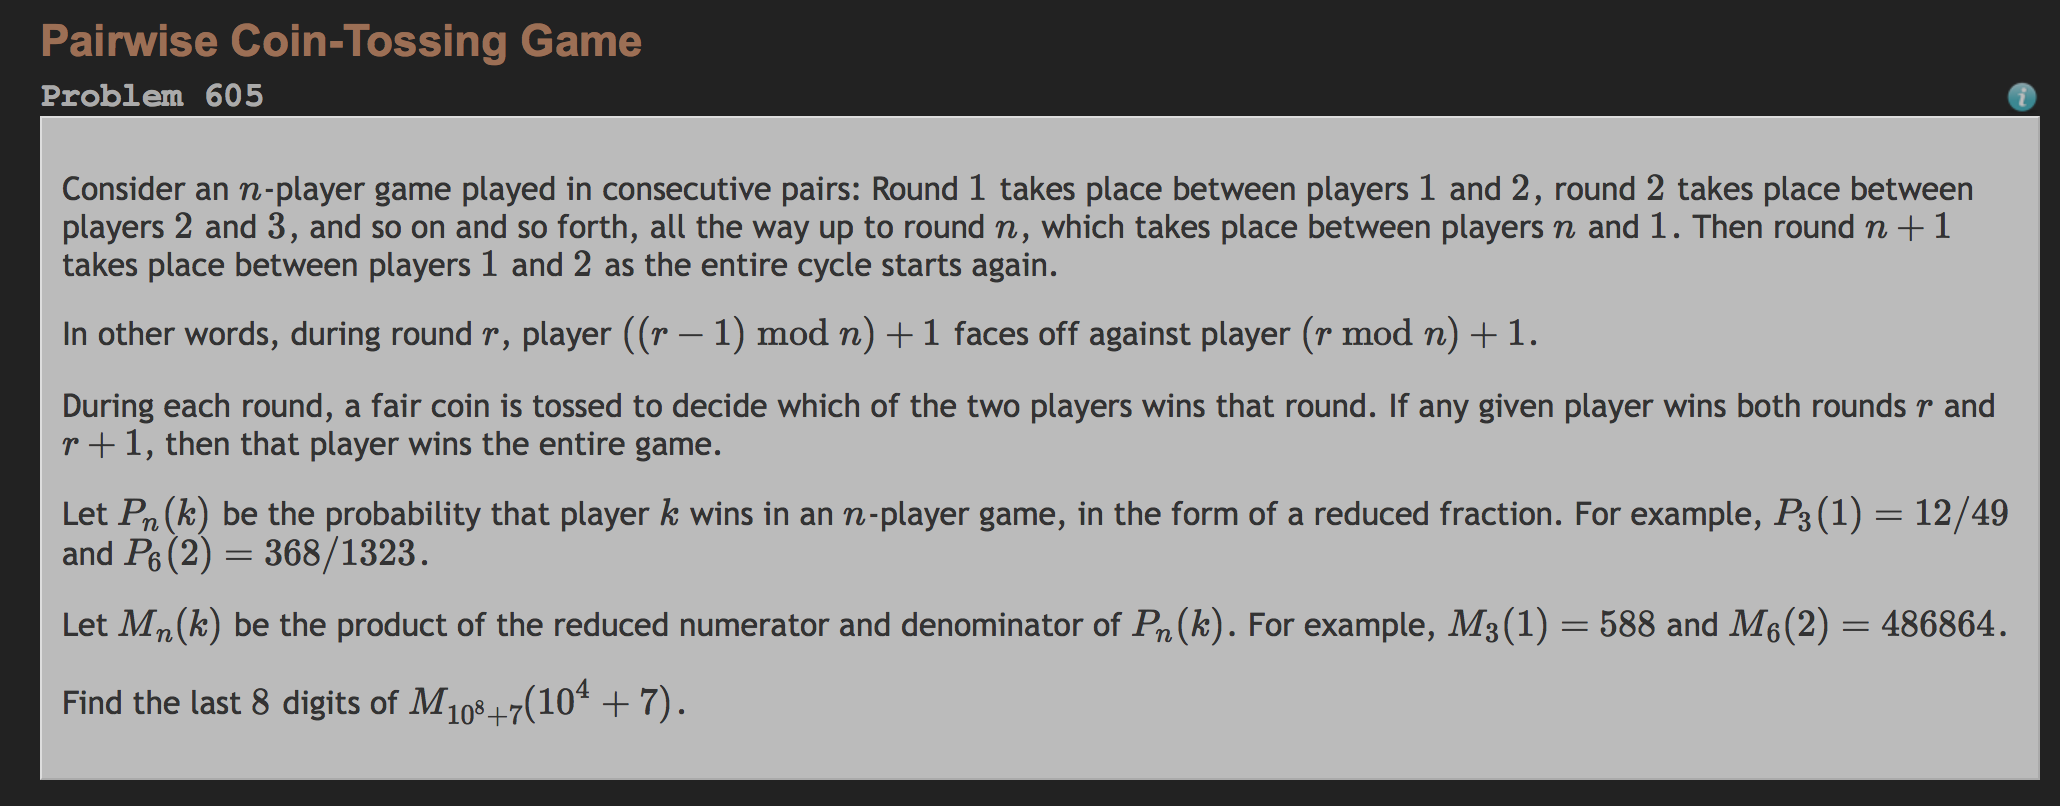

In [239]:
from IPython.display import Image
Image(filename='Euler605Problem.png') 

## ***Part 1: Simulating to get a feel...***

I started off by simulating the game as a Markov process to get an intuition about how it worked and to get some practice using Numpy!

**In my transition matrix, for each player i, there are three possible states:**
* A<sub>i</sub>: Right before round *r + 1*, having won round *r*
* B<sub>i</sub>: Right before round *r + 1*, having lost round *r*
* C<sub>i</sub>: The win state


The transition matrix dimension is therefore 3n by 3n

**The transition probabilities are: **
+ A<sub>i</sub> --> C<sub>i</sub> = 0.5
+ A<sub>i</sub> --> A<sub>(i + 1)mod *n* </sub> = 0.5
+ B<sub>i</sub> --> A<sub>(i + 1)mod *n* </sub> = 0.5
+ B<sub>i</sub> --> B<sub>(i + 1)mod *n* </sub> = 0.5
+ C<sub>i</sub> --> C<sub>i</sub> = 1.0

**Finally, the starting node is B<sub>0</sub>**


### <center> **A Three Player Example (n = 3)** </center>


<center>*Starting Vector*</center>
\begin{bmatrix}
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}

<br>
<br>

<center>*Transition Matrix*</center>

\begin{bmatrix}
    0 & 0 & 0.5 & 0.5 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0.5 & 0.5 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 &  0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 &  0 & 0 & 0.5 & 0.5 & 0 & 0 \\
    0 & 0 & 0 &  0 & 0 & 0 & 0.5 & 0.5 & 0 \\
    0 & 0 & 0 &  0 & 0 & 1 & 0 & 0 & 0 \\
    0.5 & 0 & 0 &  0 & 0 & 0 & 0 & 0 & 0.5 \\
    0.5 & 0.5 & 0 &  0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 &  0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}

### *The code...*

In [240]:
# setting up the environment

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [241]:
#Function To Create The Transition Matrix For An Arbitrary Size Game

def createTransitionMatrix(numPlayers):
    dimension = numPlayers * 3
    
    transitionMatrix = []
    
    for i in range(numPlayers):
        rowA = [0] * dimension
        rowB = [0] * dimension
        rowC = [0] * dimension
        
        if i == (numPlayers - 1):
            rowA[dimension - 1] = 0.5
            rowA[0] = 0.5
        else:
            rowA[i * 3 + 2] = 0.5
            rowA[i * 3 + 3] = 0.5
        
        if i == (numPlayers - 1):
            rowB[0] = 0.5
            rowB[1] = 0.5
        else:
            rowB[i * 3 + 3] = 0.5
            rowB[i * 3 + 4] = 0.5
        
        rowC[i * 3 + 2] = 1
        
        transitionMatrix.append(rowA)
        transitionMatrix.append(rowB)
        transitionMatrix.append(rowC)

    return transitionMatrix


In [242]:
#Function To Simulate The Game

def simulateGame(numberOfPlayers, numberOfSimulations, start = []):

    transitionMatrix = np.array(createTransitionMatrix(numberOfPlayers))

    if len(start) == 0:
        start = np.zeros(numberOfPlayers * 3)
        start[1] = 1

    for i in range(numberOfSimulations):
        start = np.dot(start, transitionMatrix)
        
    winProb = []
    
    for i in range(numberOfPlayers):
        winProb.append(start[i * 3 + 2])
        
    return start, winProb

#Function To Print The Results
def printWinProbabilities(winProbs, i = -1):
    print("Probability of Winning In {:} Player Game".format(len(winProbs)))
    
    if i == -1:
        for i in range(len(winProbs)):
            print("Player {}: {:0.3f}".format(i + 1, winProbs[i]))
    else:
        print("Player {}: {:0.3f}".format(i, winProbs[i-1]))

**Three Player Simulation**

In [243]:
_, winProb = simulateGame(3, 10000);
printWinProbabilities(winProb)

Probability of Winning In 3 Player Game
Player 1: 0.245
Player 2: 0.408
Player 3: 0.347


**Ten Player Simulation**

In [244]:
_, winProb = simulateGame(6, 10000);
printWinProbabilities(winProb)

Probability of Winning In 6 Player Game
Player 1: 0.048
Player 2: 0.278
Player 3: 0.266
Player 4: 0.197
Player 5: 0.130
Player 6: 0.081


**100 Player Simulation**

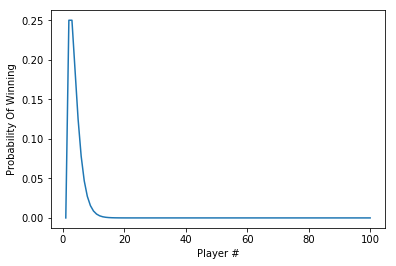

In [245]:
_, winProb = simulateGame(100, 10000);
plt.ylabel('Probability Of Winning')
plt.xlabel('Player #')
plt.plot(range(1,101), winProb)


## ***Part 2: Putting It Together: Simulation Results + Math***

<font color='green'>**State A<sub>i</sub> Conclusions:**</font>

1. <font color='red'>**If at any point you end up in state A<sub>i</sub> for any i, you can never get to B<sub>i</sub> for all *i*. **</font>
  In state A<sub>i</sub> , Player i has already won one round.  If he wins again (the condition that would otherwise put Player [ ( i+1 ) mod n ] in state B<sub>(i+1) mod n</sub> ), the game would end with Player i as the winner. If instead, Player i loses, Player  [ ( i+1 ) mod n ]  enters state A<sub>(i+1) mod n</sub> making it impossible to achieve state B<sub>(i+2) mod n</sub> by the same logic (and so forth for all subsequent rounds).
    
2. <font color='red'>**If you are in state A<sub>i</sub>, the probablity of returning to state A<sub>i</sub> after one full cycle through the players is (1/2)^n.**</font>
    Starting in A<sub>i</sub>, there is only one sequence that gets you all the way back around to A<sub>i</sub> which is an n-length sequence of a loss for i, a loss for i + 1, a loss for i + 2, etc.  If anything else happens along the way, the game will end.

3. <font color='red'>**If you are in state A<sub>i</sub>, there is a 1/2 chance that Player i wins during the next round**</font>

**Putting (1), (2) and (3) together, once in state A<sub>i</sub>, the chance Player i wins the game is:**
    
   $$=P_{n}(i Wins From A_{i})=(\frac{1}{2} + \frac{1}{2^n} * (\frac{1}{2} + \frac{1}{2^n} * (\frac{1}{2} + \frac{1}{2^n} * (..$$
   <br />
   $$=\sum_{i=0}^{\infty} \frac{1}{2^{n*i+1}}$$
   <br />
   $$=\frac{2^{n-1}}{2^{n}-1}$$

<br />

We can verify this with our simulation...


In [246]:
def probPlayerWinsFromAFormula(numPlayers):
    n = numPlayers
    return (2 ** (n - 1))/(2 ** n - 1)

def probPlayerWinsFromASimulation(numPlayers):
    n = numPlayers
    start = np.zeros(n * 3)
    start[0] = 1
    _, winProb = simulateGame(n, 10000,start=start)
    return winProb[0]

In [247]:
print("Probability That Player 1 Wins After Starting In State A1")
print("-"*len("Probability That Player 1 Wins After Starting In State A1\n"))
print("{:^15} {:^15} {:^15}".format("# of Players", "Formula", "Simulation"))
          
for i in range(3, 10):
    print("{:^15} {:^15.5f} {:^15.5f}".format(i, probPlayerWinsFromAFormula(i), probPlayerWinsFromASimulation(i)))

Probability That Player 1 Wins After Starting In State A1
----------------------------------------------------------
 # of Players       Formula       Simulation   
       3            0.57143         0.57143    
       4            0.53333         0.53333    
       5            0.51613         0.51613    
       6            0.50794         0.50794    
       7            0.50394         0.50394    
       8            0.50196         0.50196    
       9            0.50098         0.50098    


   
<br />
<font color='green'>**State B<sub>i</sub> Conclusions:**</font>

1. <font color='red'>**If you are in state B<sub>i</sub>, the probablity of returning to state B<sub>i</sub> after one full cycle through the players is (1/2)^n.**</font>
    As per (3) above, if you enter state A for any player, you cannot get back to state B for all players.  Therefore, no player can win their first round and and there is only one path that gets you back to B<sub>i</sub>.  That path is a win for player i (to state B<sub>(i+1) mod n</sub>), a win for player i + 1 (to state B<sub>(i+2) mod n</sub>), ... back to B<sub>i</sub>.
    
2. <font color='red'>**If you are in state B<sub>i</sub>, the probablity of returning to state A<sub>i</sub> after one full cycle through the players is n *(1/2)^n.**</font>
   From (2) above, if you reach state A for any player, there is subsequently only one path to reach A<sub>i</sub>.  We can create n unique paths (one for each player) where we stay in state B until B<sub>j</sub> transitions to A<sub>(j+1) mod n</sub> before ultimately returning to A<sub>i</sub></font>

3. <font color='red'>**If you are in state B<sub>i</sub>, you cannot reach C<sub>i</sub> after the next round**</font>

**Putting (1), (2) and (3) together, once in state B<sub>i</sub>, the chance Player i wins the game is:**

   $$=P_{n}(i Wins From B_{i})=(\frac{n}{2^n}*P_{n}(i Wins From A_{i}) + \frac{1}{2^n} * P_{n}(i Wins From B_{i})$$
   <br />
   $$=(\frac{n}{2^n}*\frac{2^{n-1}}{2^{n}-1} + \frac{1}{2^n} * (\frac{n}{2^n}*\frac{2^{n-1}}{2^{n}-1} + \frac{1}{2^n} * (\frac{n}{2^n}*\frac{2^{n-1}}{2^{n}-1} + \frac{1}{2^n} * (...$$
     <br />
   $$=(\frac{n}{2 * (2^{n}-1)} + \frac{1}{2^n} * (\frac{n}{2 * (2^{n}-1)} + \frac{1}{2^n} * (\frac{n}{2 * (2^{n}-1)} + \frac{1}{2^n} * (...$$
     <br />
   $$=\frac{n}{2 * (2^{n}-1)}\sum_{i=0}^{\infty}\frac{1}{2 ^ {ni}}$$
   <br />
   $$=\frac{n}{2 * (2^{n}-1)}*\frac{2^n}{2^n-1}$$
   <br />
   $$=\frac{2^{n-1}*n}{(2^{n}-1)^2}$$

<br />

We can verify this with our simulation...



In [248]:
def probPlayerWinsFromBFormula(numPlayers):
    n = numPlayers
    return (2 ** (n - 1) * n)/((2 ** n - 1)**2)

def probPlayerWinsFromBSimulation(numPlayers):
    n = numPlayers
    start = np.zeros(n * 3)
    start[1] = 1
    _, winProb = simulateGame(n, 10000,start=start)
    return winProb[0]

In [249]:
print("Probability That Player 1 Wins After Starting In State B1")
print("-"*len("Probability That Player 1 Wins After Starting In State B1\n"))
print("{:^15} {:^15} {:^15}".format("# of Players", "Formula", "Simulation"))
          
for i in range(3, 10):
    print("{:^15} {:^15.5f} {:^15.5f}".format(i, probPlayerWinsFromBFormula(i), probPlayerWinsFromBSimulation(i)))

Probability That Player 1 Wins After Starting In State B1
----------------------------------------------------------
 # of Players       Formula       Simulation   
       3            0.24490         0.24490    
       4            0.14222         0.14222    
       5            0.08325         0.08325    
       6            0.04837         0.04837    
       7            0.02778         0.02778    
       8            0.01575         0.01575    
       9            0.00882         0.00882    


### Now it's time to figure out P<sub>n</sub>(k)!

We start the game in B<sub>0</sub>, so for player k, we just need to figure out the probability to go from B<sub>0</sub> to A<sub>k</sub> and the probability to go from B<sub>0</sub> to B<sub>k</sub> and then we can multiply by P<sub>n</sub>(k Wins from A<sub>k</sub>) and P<sub>n</sub>(k Wins from B<sub>k</sub>), respectively, and sum to get the complete formula.

1. <font color='red'>**If you are in state B<sub>0</sub>, the probablity of reaching state B<sub>k</sub> is (1/2)^(k-1).**</font> You can think of this as a reduced version of (1) from the prior section where the cycle is length k instead of length n <sub>i</sub>.
    
2. <font color='red'>**If you are in state B<sub>0</sub>, the probablity of returning to state A<sub>0</sub> after one full cycle through the players is (k-1)*(1/2)^(k-1).**</font> You can think of this as a reduced version of (2) from the prior section where the cycle is length k instead of length n <sub>i</sub>.

**Putting it all together...**

$$P_{n}(k)=\frac{1}{2^k}*\frac{2^{n-1}n}{(2^{n}-1)^2} + \frac{k}{2^k} * \frac{2^{n-1}}{2^{n}-1}$$
<br />
$$=\frac{2^{n-k} * (1 + 2^n (k-1) - k + n)}{(2^n - 1)^2}$$

One last time, let's verify this with our simulation...

In [250]:
def probPlayerWins(player, numPlayers):
    n = numPlayers
    k = player
    return ((2 ** (n - k)) * (1 + 2 ** n * (k - 1) - k + n))/((2**n -1)**2)


In [251]:
n = 3

_, winProb = simulateGame(n, 10000)

print("Probability That Player k Wins in an {} player game".format(n))
print("-"*len("Probability That Player k Wins in an {} player game".format(n)))
print("{:^15} {:^15} {:^15}".format("k", "Formula", "Simulation"))
          
for i in range(n):
    print("{:^15} {:^15.5f} {:^15.5f}".format(i+1, probPlayerWins(i+1, n), winProb[i]))

Probability That Player k Wins in an 3 player game
--------------------------------------------------
       k            Formula       Simulation   
       1            0.24490         0.24490    
       2            0.40816         0.40816    
       3            0.34694         0.34694    


In [252]:
n = 10
_, winProb = simulateGame(n, 10000)

print("Probability That Player k Wins in an {} player game".format(n))
print("-"*len("Probability That Player k Wins in an {} player game".format(n)))
print("{:^15} {:^15} {:^15}".format("k", "Formula", "Simulation"))
          
for i in range(n):
    print("{:^15} {:^15.5f} {:^15.5f}".format(i+1, probPlayerWins(i+1, n), winProb[i]))

Probability That Player k Wins in an 10 player game
---------------------------------------------------
       k            Formula       Simulation   
       1            0.00489         0.00489    
       2            0.25269         0.25269    
       3            0.25147         0.25147    
       4            0.18829         0.18829    
       5            0.12543         0.12543    
       6            0.07835         0.07835    
       7            0.04700         0.04700    
       8            0.02741         0.02741    
       9            0.01566         0.01566    
      10            0.00881         0.00881    


**It works!!!!**

## ***Part 3: Getting The Answer***

Now we need to evaluate P<sub>n</sub>(k) with k = 10^4 + 1 and n = 10^8 + 1 and get the last 8 digits of the product of the reduced numerator and denominator! Initially, I tried plugging it into my function from above to get the reduced fraction, but unsurprisingly it hit an overflow error quickly.  There may be a way to loosen the overflow constraints, but I figured I could come up with something better.  Effectively, if we only need the last 8 digits on the product of the numerator and denominator, for each sub-term in P<sub>n</sub>(k), we really only need to track the last 8 digits.  So to start I made this function to calculate the last 8 digits of 2^n by truncating the number any time the length went above 8 (since that won't effect the last 8 digits).  It's not lightning fast, but it was able to calculate the last 8 digits of the large terms in a reasonable amount of time.  Since those were the only terms likely to cause problems, there wasn't a real need to truncate the other terms until the very end. 



In [253]:
def lastEightDigitsOf2ToTheN(n):
    if n < 25:
        return str(2**n)[-8:]
    else:
        x = 2 ** 25

    for i in range(n - 25):
        x = x * 2
        if len(str(x)) == 9:
            x = x % 10 ** 8
    return x


<font color='red'>***LEAP OF FAITH/LUCK - I assumed/hoped that the numerator and denominator would be coprime.  That assumption proved true since I got the right answer, but I still need to come up with the math to show it!!!***</font> 

In [254]:
n = 10 ** 8 + 7
k = 10 ** 4 + 7

lastEightOfTerm1 = lastEightDigitsOf2ToTheN(n - k)
lastEightOfTerm2 = lastEightDigitsOf2ToTheN(n)

numerator = (lastEightOfTerm1 * (1 + lastEightOfTerm2 * (k  - 1) - k + n))
denominator = (lastEightOfTerm2 - 1) ** 2

print("The answer to Problem 605 is ", str(numerator * denominator)[-8:])

The answer to Problem 605 is  59992576


**And we're done!**